# Netflix Movie and TV Shows Visualizations

All data is extracted using SQL and exported to a csv file.

Data Source - https://www.kaggle.com/datasets/shivamb/netflix-shows

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
# Automated process of separating multiple words in a dataframe column so words can be counted independently
# ex. ['Dramas, Independent Movies, International Movies'], will be counted as one category
# ex. ['Dramas', 'Independent Movies', 'International Movies'], will be counted as 3 separate categories

# Add items to a dictionary
def add_to_dict(my_dict, list_of_keys):
    # Check if key exists in dictionary
    for key in list_of_keys:
        if key in my_dict:
            my_dict[key] += 1
        else:
            my_dict[key] = 1

# Returns a list by separating each element that contains a string with words by checking for a comma delimiter
def split_str(df_col):
    # Convert df column to a list
    my_list = df_col.tolist()
    # Create a list where separated words will be stored
    sep_list = []
    
    # Iterate through each element, split, and append to sep_list
    for item in my_list:
        # Split element returning a list
        split_item = item.split(',')
        
        # Check list contains a single string or multiple strings
        if len(split_item) == 1:
            sep_list.append(item.strip())
        else:
            for word in split_item:
                sep_list.append(word.strip())
                
    return sep_list

## Visualizations

In [4]:
# Movie/Show Genres
df = pd.read_csv(r'C:\Users\Mouth\Documents\Datasets\Netflix Movies and TV shows\genres.csv')
df.head()

,show_id,listed_in
0,s1,Documentaries
1,s1872,Children & Family Movies
2,s8,"Dramas, Independent Movies, International Movies"
3,s9,"British TV Shows, Reality TV"
4,s10,"Comedies, Dramas"


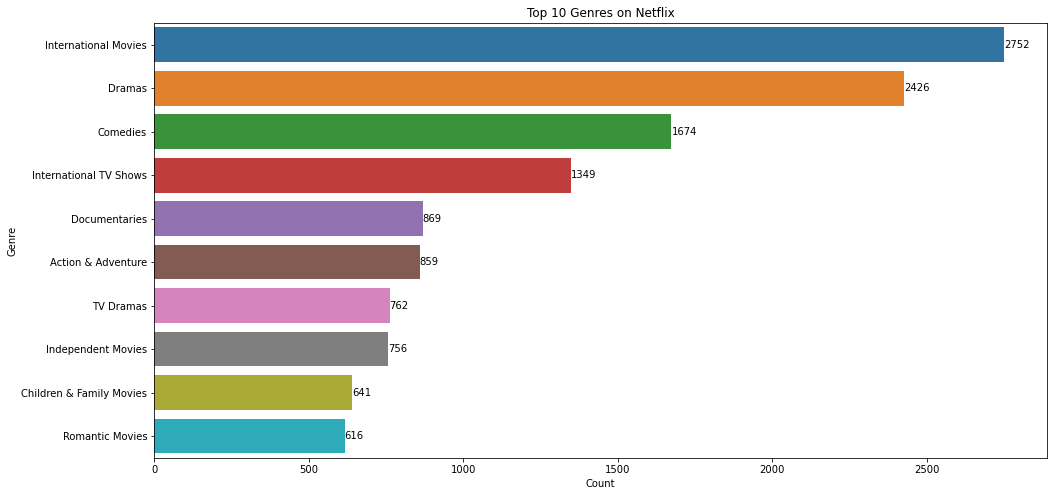

In [8]:
# Top 10 genres on Netflix?

# Populate genres dictionary with each genre
genres = {}
temp_list = split_str(df['listed_in'])
add_to_dict(genres, temp_list)
# print(genres)

data = pd.DataFrame(list(genres.items()), columns=['genres', 'amount'])
data = data.sort_values(by=['amount'], ascending=False)
data.head()

plt.figure(figsize=(16,8))
ax = sns.barplot(data=data.head(10), y='genres', x='amount')
ax.bar_label(ax.containers[0], fontsize=10)
plt.title('Top 10 Genres on Netflix')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()

In [9]:
# Countries 
df_country = pd.read_csv(r'C:\Users\Mouth\Documents\Datasets\Netflix Movies and TV shows\countries.csv')
df_country.head()

,show_id,country
0,s1,United States
1,s1872,Canada
2,s8,"United States, Ghana, Burkina Faso, United Kin..."
3,s9,United Kingdom
4,s10,United States


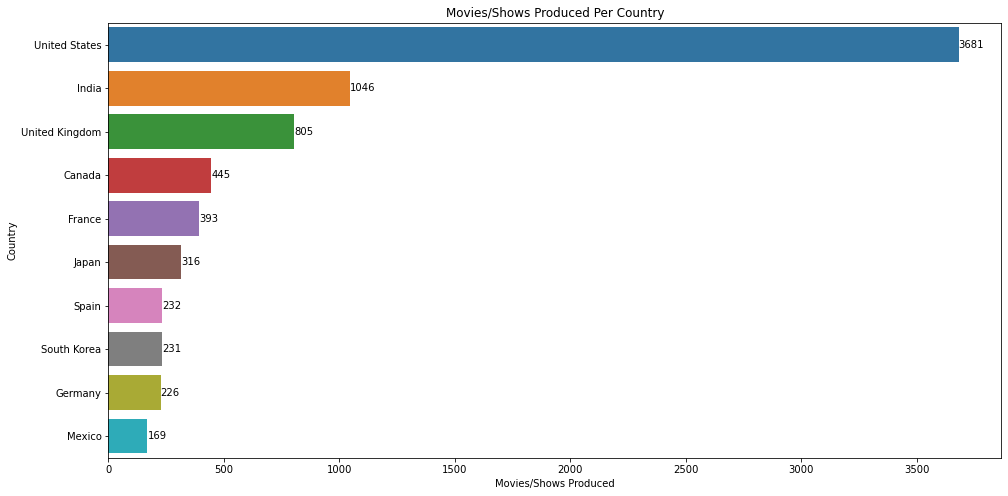

In [11]:
# Top 10 countries where Netflix titles are produced

# Populate countries dictionary with each country 
countries = {}
temp_list = split_str(df_country['country'])
add_to_dict(countries, temp_list)

# If the country of the movie/show is not known, it is labelled as 'Unknown' and needs to be removed
del countries['Unknown']

# print(countries)

data = pd.DataFrame(list(countries.items()), columns=['country', 'titles_produced'])
data = data.sort_values(by=['titles_produced'], ascending=False)
data.head()

plt.figure(figsize=(16,8))
ax = sns.barplot(data=data.head(10), y='country', x='titles_produced')
ax.bar_label(ax.containers[0], fontsize=10)
plt.title('Movies/Shows Produced Per Country')
plt.xlabel('Movies/Shows Produced')
plt.ylabel('Country')
plt.show()

In [12]:
# Directors
df_dir = pd.read_csv(r'C:\Users\Mouth\Documents\Datasets\Netflix Movies and TV shows\directors.csv')
df_dir.head()

,show_id,director
0,s1,Kirsten Johnson
1,s8,Haile Gerima
2,s10,Theodore Melfi
3,s5613,"Joachim Fest, Christian Herrendoerfer"
4,s13,Christian Schwochow


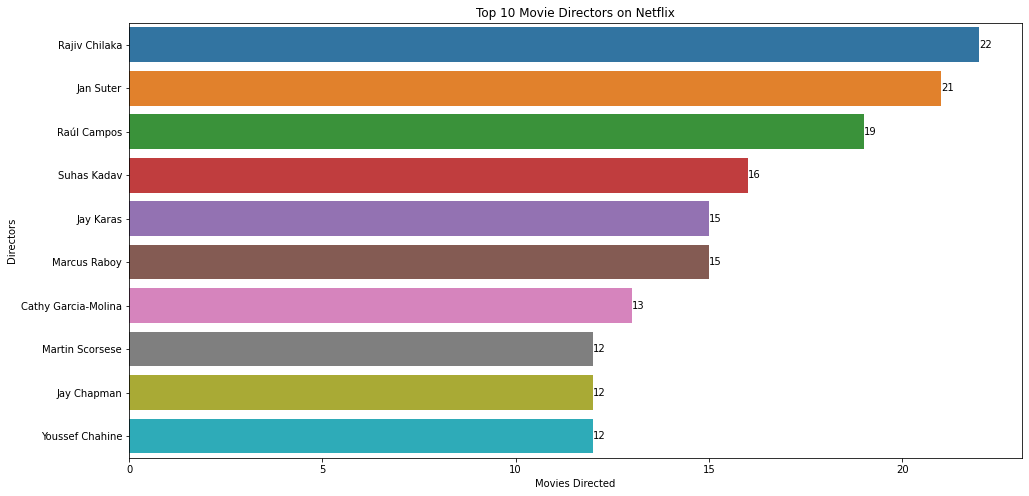

In [13]:
# Top 10 movie directors on Netflix

dir_country = {}

# Split directors column (some rows have multiple directors, we have to split them)
temp_list = split_str(df_dir['director'])
add_to_dict(dir_country, temp_list)
# print(dir_country)

data = pd.DataFrame(list(dir_country.items()), columns=['director', 'movies_dir'])
data = data.sort_values(by=['movies_dir'], ascending=False)
data.head()

plt.figure(figsize=(16,8))
ax = sns.barplot(data=data.head(10), y='director', x='movies_dir')
ax.bar_label(ax.containers[0], fontsize=10)
plt.title('Top 10 Movie Directors on Netflix')
plt.xlabel('Movies Directed')
plt.ylabel('Directors')
plt.show()

In [15]:
# Compare the movie/show year added to Netflix vs. actual release year of the movie/show
df_add_titles = pd.read_csv(r'C:\Users\Mouth\Documents\Datasets\Netflix Movies and TV shows\date_added_released.csv')
df_add_titles.head()

,year_added,release_year,amt
0,2017,2017,379
1,2017,2016,328
2,2017,2015,139
3,2017,2014,81
4,2017,2013,55


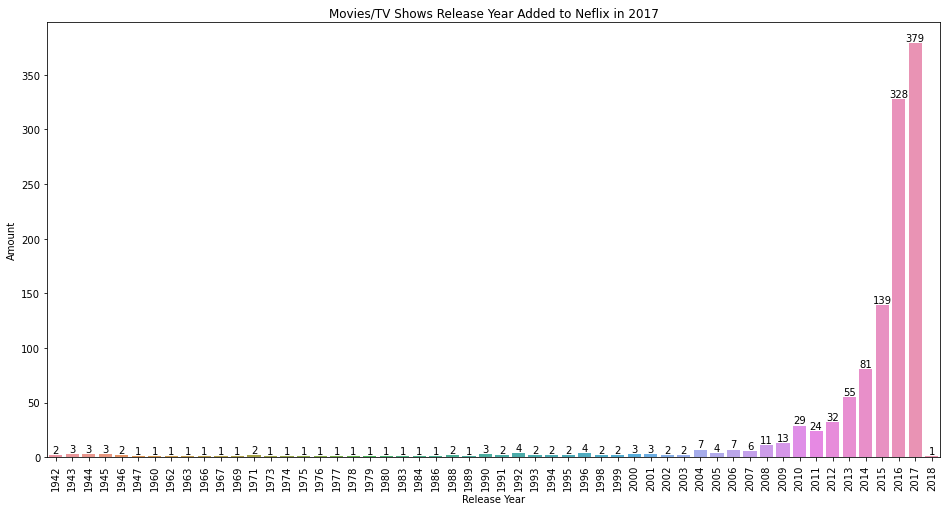

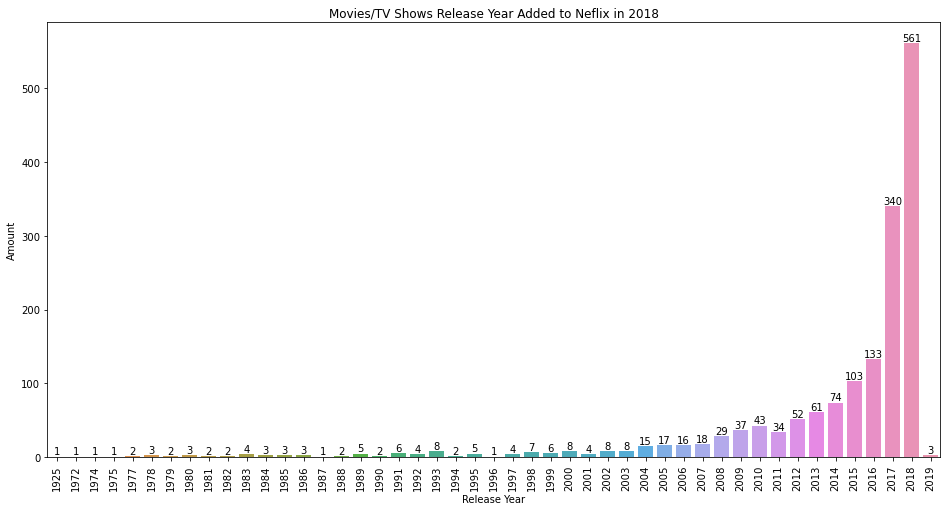

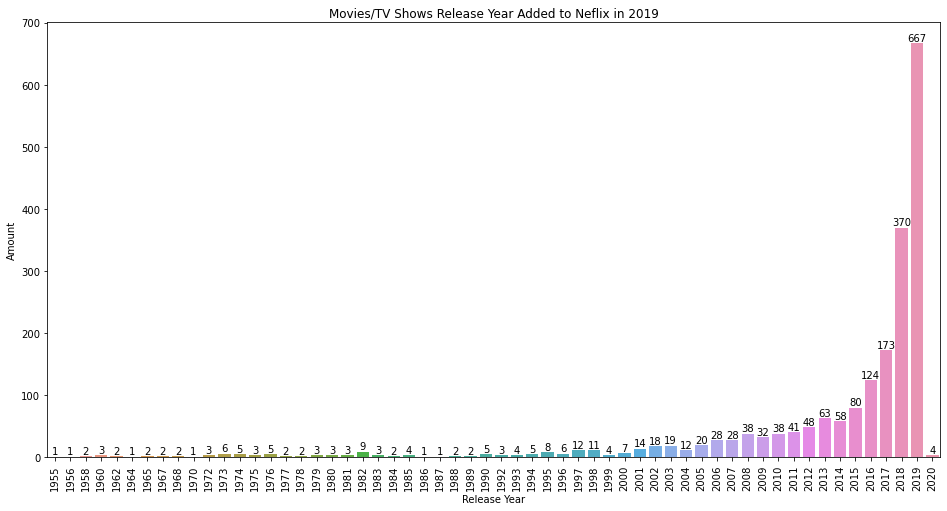

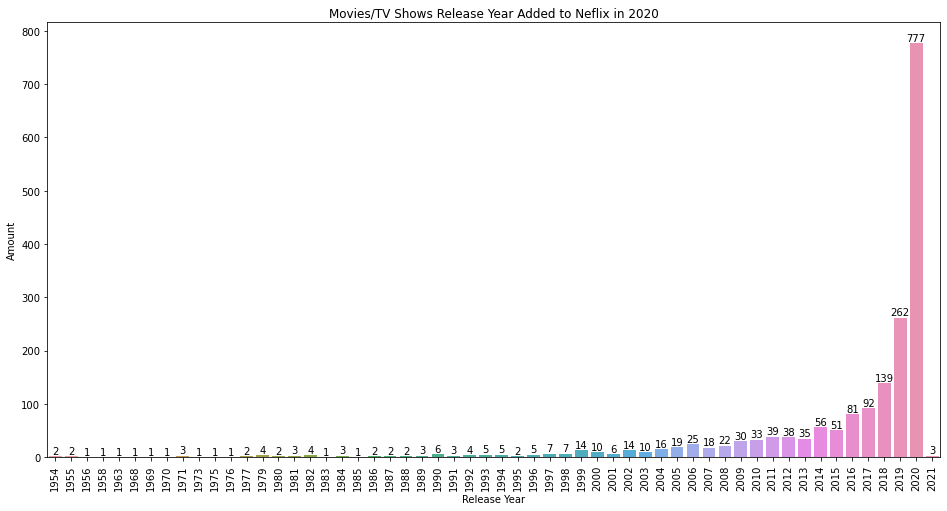

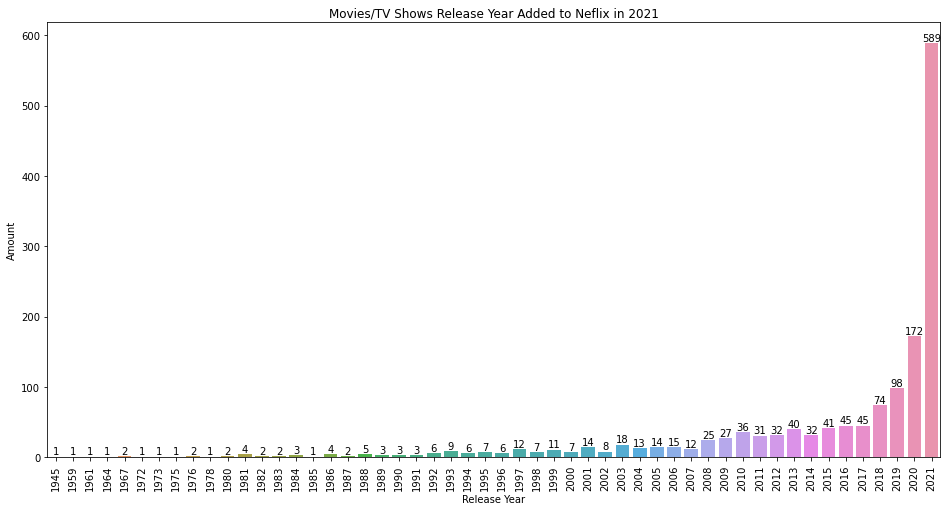

In [16]:
# How new are the titles being added to Netflix over the last 5 years?

# Slice the data for each year by finding unique values in the year_added col
years = df_add_titles['year_added'].unique()

for year in years:
    df_per_year = df_add_titles[df_add_titles['year_added']==year]
    
    plt.figure(figsize=(16,8))
    ax = sns.barplot(data=df_per_year, x='release_year', y='amt')
    ax.bar_label(ax.containers[0], fontsize=10)
    plt.title(f'Movies/TV Shows Release Year Added to Neflix in {year}')
    plt.xlabel('Release Year')
    plt.ylabel('Amount')
    plt.xticks(rotation=90)
    plt.show()

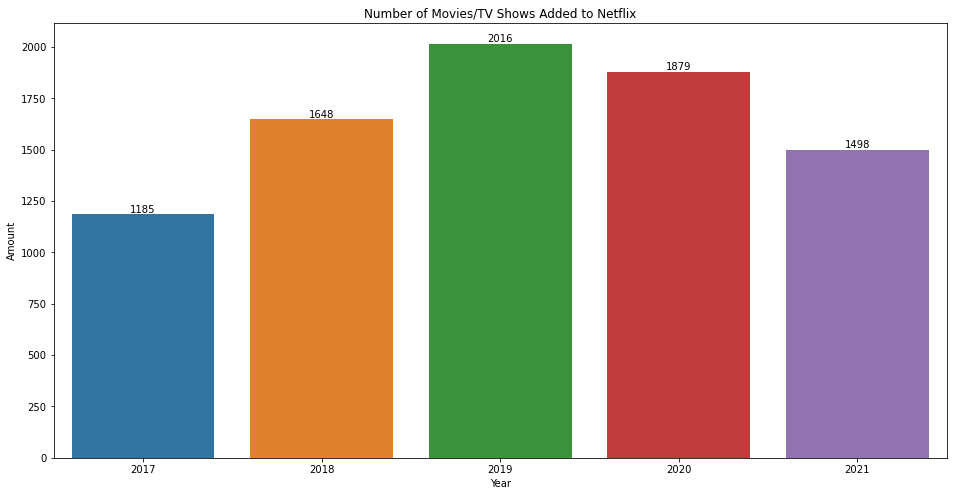

In [22]:
# How many movies/tv shows have been added to Netflix per year?
movie_shows_added = df_add_titles.groupby(by='year_added')['amt'].sum().reset_index()

plt.figure(figsize=(16,8))
ax = sns.barplot(data=movie_shows_added, x='year_added', y='amt')
ax.bar_label(ax.containers[0], fontsize=10)
plt.title('Number of Movies/TV Shows Added to Netflix')
plt.xlabel('Year')
plt.ylabel('Amount')
plt.show()


In [24]:
# Which countries contribute the the most Movies vs. TV Shows?
df_country_mosh = pd.read_csv(r'C:\Users\Mouth\Documents\Datasets\Netflix Movies and TV shows\country_mov_show.csv')
df_country_mosh.head()

,country,type
0,United States,Movie
1,Canada,Movie
2,"United States, Ghana, Burkina Faso, United Kin...",Movie
3,United Kingdom,TV Show
4,United States,Movie


In [61]:
# Top 10 countries that produce Movie/TV Shows on Netflix breakdown
movies_per_country = df_country_mosh[df_country_mosh['type']=='Movie'].groupby(by=['country']).count()\
    .sort_values(by='type', ascending=False).reset_index()

shows_per_country = df_country_mosh[df_country_mosh['type']=='TV Show'].groupby(by=['country']).count()\
    .sort_values(by='type', ascending=False).reset_index()

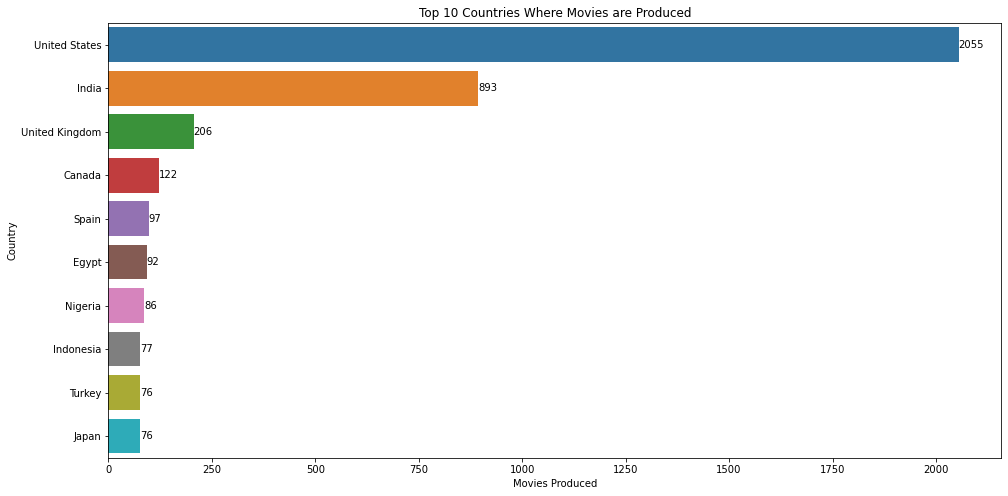

In [64]:
plt.figure(figsize=(16,8))
ax = sns.barplot(data=movies_per_country.head(10), y='country', x='type')
ax.bar_label(ax.containers[0], fontsize=10)
plt.title('Top 10 Countries Where Movies are Produced')
plt.xlabel('Movies Produced')
plt.ylabel('Country')
plt.show()

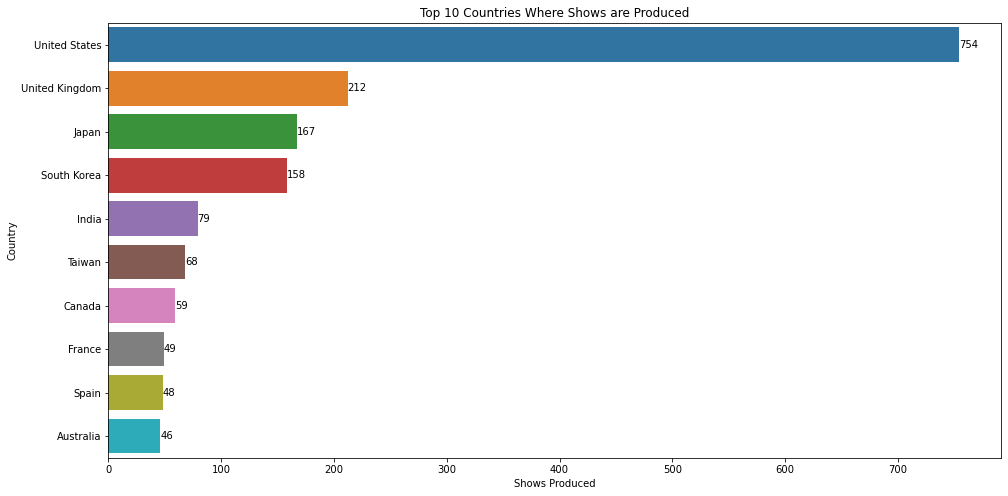

In [66]:
plt.figure(figsize=(16,8))
ax = sns.barplot(data=shows_per_country.head(10), y='country', x='type')
ax.bar_label(ax.containers[0], fontsize=10)
plt.title('Top 10 Countries Where Shows are Produced')
plt.xlabel('Shows Produced')
plt.ylabel('Country')
plt.show()

In [67]:
# Content rating on Movies/TV Shows on Netflix
content_ratings = pd.read_csv(r'C:\Users\Mouth\Documents\Datasets\Netflix Movies and TV shows\ratings.csv')
content_ratings.head()

,rating,amt
0,TV-MA,3205
1,TV-14,2157
2,TV-PG,861
3,R,799
4,PG-13,490


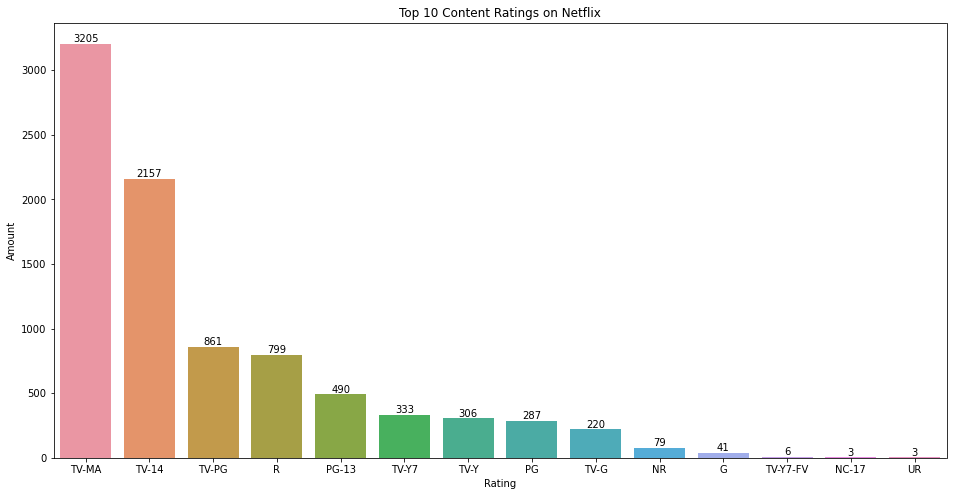

In [73]:
# Top 10 ratings on Netflix
plt.figure(figsize=(16,8))
ax = sns.barplot(data=content_ratings, x='rating', y='amt')
ax.bar_label(ax.containers[0], fontsize=10)

plt.title('Top 10 Content Ratings on Netflix')
plt.xlabel('Rating')
plt.ylabel('Amount')
plt.show()